In [40]:
import pandas as pd
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [41]:
#Creating dataframes
dfcsv = pd.read_csv('sales_data_sample.csv', encoding = "latin")
dfxlsx  = pd.read_excel('sales_data_sample.xlsx')
# dfjson  = pd.read_json('/content/customers.json', encoding = "latin")

In [42]:
#Printing first 5 rows of dataset
dfcsv.head(5)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [43]:
#Shape command to know the rows and columns in dataset
dfcsv.shape

(2823, 25)

In [44]:
#prints information about the DataFrame
dfcsv.info

<bound method DataFrame.info of       ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES   
0           10107               30      95.70                2  2871.00  \
1           10121               34      81.35                5  2765.90   
2           10134               41      94.74                2  3884.34   
3           10145               45      83.26                6  3746.70   
4           10159               49     100.00               14  5205.27   
...           ...              ...        ...              ...      ...   
2818        10350               20     100.00               15  2244.40   
2819        10373               29     100.00                1  3978.51   
2820        10386               43     100.00                4  5417.57   
2821        10397               34      62.24                1  2116.16   
2822        10414               47      65.52                9  3079.44   

            ORDERDATE    STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...   


In [45]:
#Checks for NA values in columns
dfcsv.isna().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [46]:
#for calculating some statistical data like percentile, mean and std of the numerical values of the Series or DataFrame
dfcsv.describe

<bound method NDFrame.describe of       ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES   
0           10107               30      95.70                2  2871.00  \
1           10121               34      81.35                5  2765.90   
2           10134               41      94.74                2  3884.34   
3           10145               45      83.26                6  3746.70   
4           10159               49     100.00               14  5205.27   
...           ...              ...        ...              ...      ...   
2818        10350               20     100.00               15  2244.40   
2819        10373               29     100.00                1  3978.51   
2820        10386               43     100.00                4  5417.57   
2821        10397               34      62.24                1  2116.16   
2822        10414               47      65.52                9  3079.44   

            ORDERDATE    STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  

In [47]:
#Dropping unnecessary columns
dfcsv = dfcsv.drop(['ADDRESSLINE1','ADDRESSLINE2','CITY','STATE','TERRITORY'],axis = 1)

In [48]:
dfcsv.isna().sum()

ORDERNUMBER          0
QUANTITYORDERED      0
PRICEEACH            0
ORDERLINENUMBER      0
SALES                0
ORDERDATE            0
STATUS               0
QTR_ID               0
MONTH_ID             0
YEAR_ID              0
PRODUCTLINE          0
MSRP                 0
PRODUCTCODE          0
CUSTOMERNAME         0
PHONE                0
POSTALCODE          76
COUNTRY              0
CONTACTLASTNAME      0
CONTACTFIRSTNAME     0
DEALSIZE             0
dtype: int64

In [49]:
#Filling all NA values with mode of the POSTALCODE column
dfcsv = dfcsv['POSTALCODE'].fillna(dfcsv.POSTALCODE.mode(), inplace=True)

In [50]:
columns_to_drop = ['ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'TERRITORY']

# Drop the specified columns
dfxlsx = dfxlsx.drop(columns_to_drop, axis=1)

In [51]:
postalcode_mode = dfxlsx['POSTALCODE'].mode()[0]  # [0] is used to get the first mode value

# Fill NA values in 'POSTALCODE' with the mode
dfxlsx['POSTALCODE'].fillna(postalcode_mode, inplace=True)

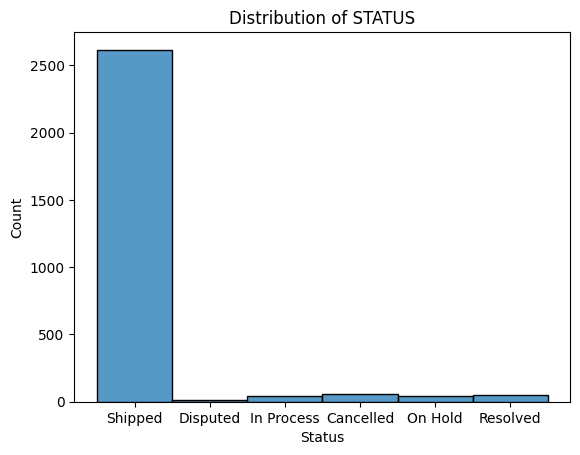

In [52]:
sns.histplot(x='STATUS', data=dfxlsx)
plt.xlabel('Status')  # Set the label for the x-axis
plt.ylabel('Count')   # Set the label for the y-axis
plt.title('Distribution of STATUS')  # Set the title for the plot

plt.show()

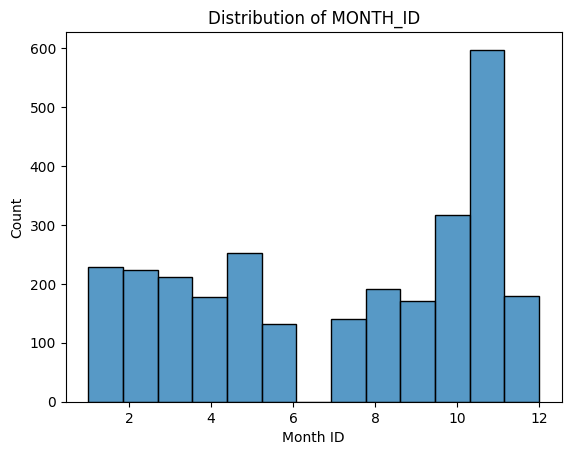

In [53]:
# Assuming 'MONTH_ID' is a numeric or categorical column
sns.histplot(x='MONTH_ID', data=dfxlsx)
plt.xlabel('Month ID')  # Set the label for the x-axis
plt.ylabel('Count')     # Set the label for the y-axis
plt.title('Distribution of MONTH_ID')  # Set the title for the plot

plt.show()

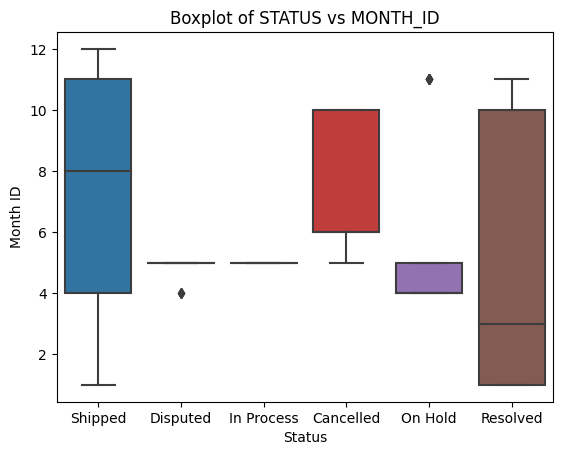

In [54]:
sns.boxplot(x='STATUS', y='MONTH_ID', data=dfxlsx)
plt.xlabel('Status')  # Set the label for the x-axis
plt.ylabel('Month ID')  # Set the label for the y-axis
plt.title('Boxplot of STATUS vs MONTH_ID')  # Set the title for the plot

plt.show()

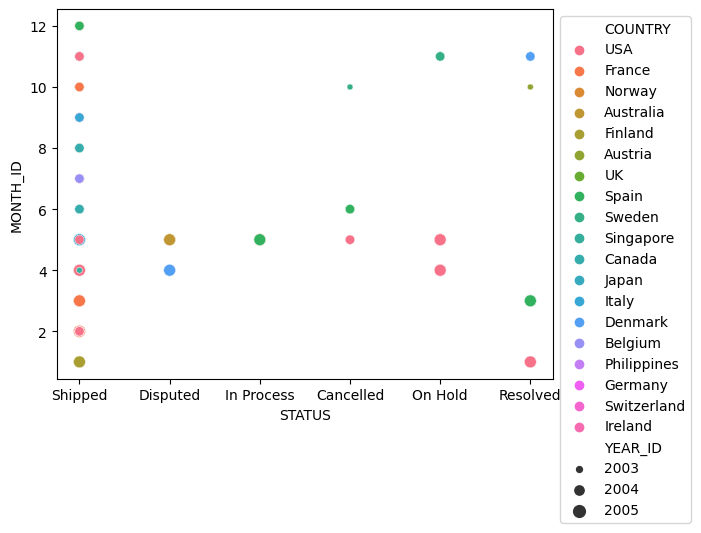

In [55]:
#Plotting Scatterplot
sns.scatterplot( x="STATUS", y="MONTH_ID", data=dfxlsx,
                hue='COUNTRY', size='YEAR_ID')

# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)

plt.show()

In [56]:
#Checking the data only for shipped STATUS
data1=dfxlsx[dfxlsx["STATUS"]=='Shipped']
data1.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2003-07-05 00:00:00,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2003-01-07 00:00:00,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,90003,USA,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,2003-10-10 00:00:00,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,6505551386,28034,USA,Brown,Julie,Medium


In [57]:
data1.shape

(2617, 20)

In [58]:
#Calculating sum for sales column
sum_sales = dfxlsx['SALES'].sum()
print("Addition of all sales",sum_sales)

Addition of all sales 10032628.85


In [59]:
#Calulating average for sales column
sales_avg = dfxlsx['SALES'].mean()
print("Average of total sales = ",sales_avg)

Average of total sales =  3553.889071909316


Old Shape:  (2823, 20)
New Shape:  (2742, 20)


C:\Users\bhang\AppData\Local\Temp\ipykernel_22228\1705199008.py:6: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(dfxlsx['SALES'], 25,
C:\Users\bhang\AppData\Local\Temp\ipykernel_22228\1705199008.py:9: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(dfxlsx['SALES'], 75,


<Axes: xlabel='SALES'>

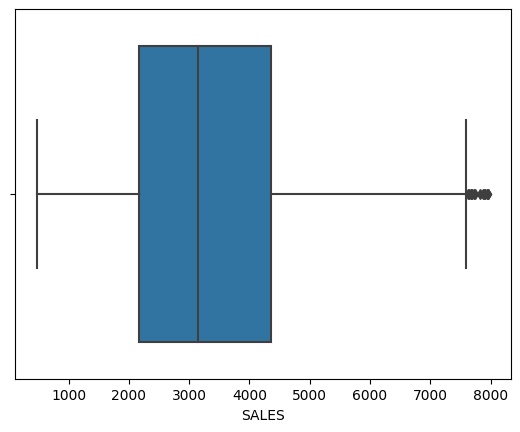

In [60]:
import sklearn
import pandas as pd
import seaborn as sns

# IQR
Q1 = np.percentile(dfxlsx['SALES'], 25,
				interpolation = 'midpoint')

Q3 = np.percentile(dfxlsx['SALES'], 75,
				interpolation = 'midpoint')
IQR = Q3 - Q1

print("Old Shape: ", dfxlsx.shape)

# Upper bound
upper = np.where(dfxlsx['SALES'] >= (Q3+1.5*IQR))

# Lower bound
lower = np.where(dfxlsx['SALES'] <= (Q1-1.5*IQR))

# Removing the Outliers
dfxlsx.drop(upper[0], inplace = True)
dfxlsx.drop(lower[0], inplace = True)

print("New Shape: ", dfxlsx.shape)

sns.boxplot(x='SALES', data=dfxlsx)